In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from keras import regularizers

In [54]:
df = pd.read_csv("data.txt", sep=";")

In [55]:
df.shape

(4424, 37)

In [56]:
X_train = df.iloc[:,:36]
y_train = df.iloc[:, 36]
orig_feature_names = list(X_train.columns)

In [57]:
y = y_train.replace(to_replace=["Dropout","Graduate", "Enrolled"], value=[1,0,0])

In [58]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([3003, 1421], dtype=int64))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.40, random_state=42, stratify=y)

In [60]:
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.50, random_state=42, stratify=y_test)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(2654, 36)
(885, 36)
(885, 36)


In [62]:
X_train = pd.DataFrame(X_train, columns=orig_feature_names)
X_cv = pd.DataFrame(X_cv, columns=orig_feature_names)

In [73]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',subsample=0.9, colsample_bytree=0.5, seed=42, max_depth=4, learning_rate=0.1, scale_pos_weight=0.3, gamma=0.25)
model.fit(X_train, y_train, eval_set=[(X_cv, y_cv)])

[0]	validation_0-auc:0.78391
[1]	validation_0-auc:0.91681
[2]	validation_0-auc:0.91947
[3]	validation_0-auc:0.92108
[4]	validation_0-auc:0.92338
[5]	validation_0-auc:0.92649
[6]	validation_0-auc:0.92684
[7]	validation_0-auc:0.92844
[8]	validation_0-auc:0.92922
[9]	validation_0-auc:0.92930
[10]	validation_0-auc:0.92814
[11]	validation_0-auc:0.92906
[12]	validation_0-auc:0.93031
[13]	validation_0-auc:0.93109
[14]	validation_0-auc:0.93124
[15]	validation_0-auc:0.93251
[16]	validation_0-auc:0.93293
[17]	validation_0-auc:0.93307
[18]	validation_0-auc:0.93378
[19]	validation_0-auc:0.93354
[20]	validation_0-auc:0.93293
[21]	validation_0-auc:0.93328
[22]	validation_0-auc:0.93330
[23]	validation_0-auc:0.93277
[24]	validation_0-auc:0.93253
[25]	validation_0-auc:0.93312
[26]	validation_0-auc:0.93279
[27]	validation_0-auc:0.93351
[28]	validation_0-auc:0.93299
[29]	validation_0-auc:0.93291
[30]	validation_0-auc:0.93295
[31]	validation_0-auc:0.93295
[32]	validation_0-auc:0.93265
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [75]:
y_pred = model.predict(X_cv)
accuracy_score(y_cv, y_pred)

0.8745762711864407

In [76]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.8918613413715147

In [77]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8745762711864407

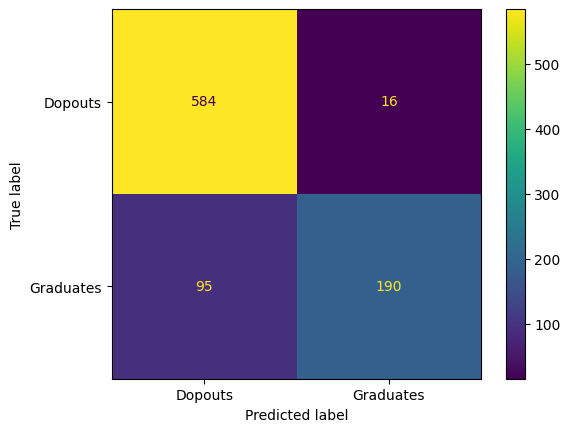

In [78]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Dopouts', 'Graduates']).figure_.savefig("conf.png", dpi=300)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


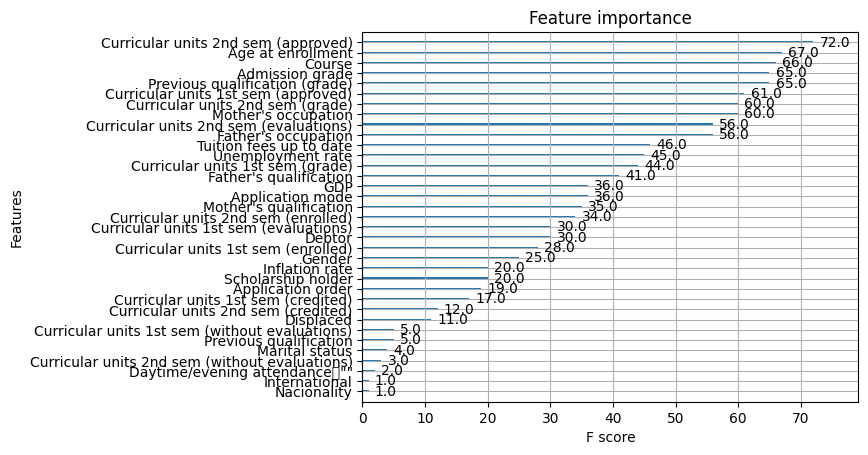

In [79]:
xgb.plot_importance(model)

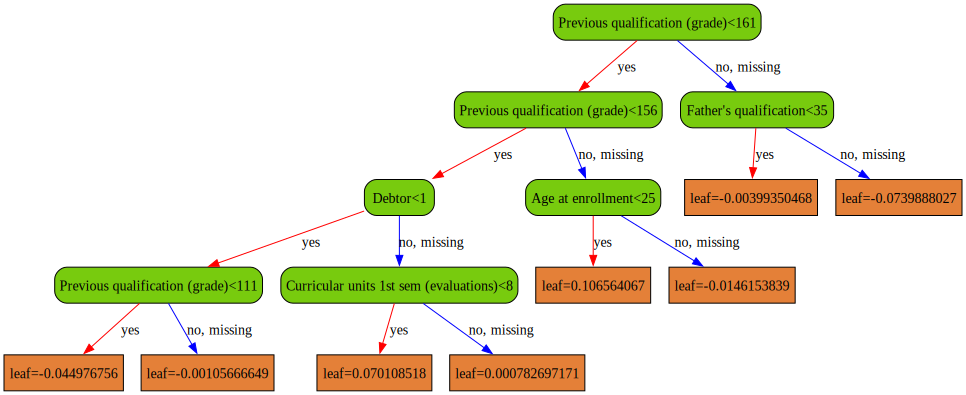

In [80]:
node_param={'shape': 'box',
           'style': 'filled, rounded',
           'fillcolor': '#78cbe'}
leaf_param={'shape': 'box',
           'style': 'filled',
           'fillcolor': '#e48038'}
xgb.to_graphviz(model, num_trees=90,size="10,10", condition_node_params=node_param, leaf_node_params=leaf_param)